In [1]:
range(3)

[0, 1, 2]

In [29]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-01-11 11:01:48	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-01-11 11:01:48	Parsing datapackage to create a Study object
2016-01-11 11:02:27	Initializing Study
2016-01-11 11:02:27	Initializing Predictor configuration manager for Study
2016-01-11 11:02:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-11 11:02:27	Added ExtraTreesClassifier to default predictors
2016-01-11 11:02:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-11 11:02:27	Added ExtraTreesRegressor to default predictors
2016-01-11 11:02:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-11 11:02:27	Added GradientBoostingClassifier to default predictors
2016-01

In [30]:
study.supplemental.voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.045048,-0.054198,0.070475,iPSC,NPC,$\searrow$,iPSC-NPC,~1,~1
1,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,~1,~1
2,exon:chr10:102114184-102114389:+@exon:chr10:10...,-0.045048,0.089286,0.100006,NPC,MN,$\nwarrow$,NPC-MN,~1,~1
3,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,NPC,NaN,iPSC-NPC,~1,~1
4,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1


In [31]:
import matplotlib as mpl


{'MN': u'#e62a8a', 'NPC': u'#396bb0', 'iPSC': u'#1b9e77', 'sMN': u'#fdc086'}

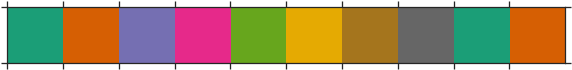

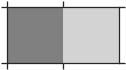

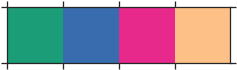

In [32]:
accent = sns.color_palette("Accent")
dark2 = sns.color_palette('Dark2', n_colors=10)
sns.palplot(dark2)



direction_to_color = dict(zip(['upstream', 'downstream'], 
                           ['lightgrey', 'grey']))
sns.palplot(pd.Series(direction_to_color))

# This is the winner!!
celltype_palette = dark2[0], accent[4], dark2[3], accent[2]
sns.palplot(celltype_palette)

celltype_palette = map(mpl.colors.rgb2hex, celltype_palette)

phenotype_to_color = dict(zip(['iPSC', 'NPC', "MN", "sMN"], celltype_palette))
# phenotype_to_color

study.metadata.phenotype_to_color = phenotype_to_color
study.phenotype_to_color

Separate ids for single cells that aren't outliers

In [33]:
singles_not_outliers = study.sample_subset_to_sample_ids('~pooled') & study.sample_subset_to_sample_ids('~outlier')
print singles_not_outliers[:5]

Index([u'CVN_01', u'CVN_02', u'CVN_03', u'CVN_04', u'CVN_05'], dtype='object')


In [34]:
figure_folder = '{}/changing_events'.format(folder)
!mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events': File exists


## Changing events

### $\Delta$ Modality

In [35]:
modalities_ipsc_mn = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.phenotype.isin(('iPSC', 'MN'))]
print modalities_ipsc_mn.shape
modalities_ipsc_mn.head()

(10229, 4)


,event_name,phenotype,modality,n_cells
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,iPSC,~1,29
1,exon:chr10:101480744-101480825:-@exon:chr10:10...,iPSC,~1,31
2,exon:chr10:101507014-101507147:+@exon:chr10:10...,iPSC,bimodal,39
3,exon:chr10:101997779-101997988:-@exon:chr10:10...,iPSC,~1,30
4,exon:chr10:102003455-102003529:-@exon:chr10:10...,iPSC,~1,27


In [36]:
modalities_ipsc_mn_changing = modalities_ipsc_mn.groupby('event_name').filter(lambda x: len(x.modality.unique()) == 2)
print modalities_ipsc_mn_changing.shape
modalities_ipsc_mn_changing.head()

(580, 4)


,event_name,phenotype,modality,n_cells
19,exon:chr10:103360960-103361093:+@exon:chr10:10...,MN,bimodal,20
21,exon:chr10:103360960-103361093:+@exon:chr10:10...,iPSC,~0,37
24,exon:chr10:103360960-103361093:+@exon:chr10:10...,MN,bimodal,20
26,exon:chr10:103360960-103361093:+@exon:chr10:10...,iPSC,~1,32
29,exon:chr10:103563492-103563776:-@exon:chr10:10...,MN,bimodal,23


In [37]:
delta_modality_events = set(modalities_ipsc_mn_changing.event_name)

### Large Voyages

In [38]:
voyages_folder = '{}/voyages'.format(figure_folder)
! mkdir $voyages_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/voyages': File exists


In [39]:
voyages = study.supplemental.voyages.loc[study.supplemental.voyages.transition == 'iPSC-MN']
voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
1,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,~1,~1
4,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1
8,exon:chr10:103348089-103348157:+@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1
11,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.019318,0.050000,0.053602,iPSC,MN,$\nwarrow$,iPSC-MN,~0,bimodal
15,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.042045,-0.050000,0.065328,iPSC,MN,$\searrow$,iPSC-MN,~1,bimodal


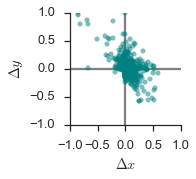

In [40]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.scatter(voyages['$\Delta x$'], voyages['$\Delta y$'], color='teal', s=20, alpha=0.5)
ax.hlines(0, -1, 1, color='grey', zorder=-1)
ax.vlines(0, -1, 1, color='grey', zorder=-1)
ax.set(xlabel='$\Delta x$', ylabel='$\Delta y$', ylim=(-1, 1), xlim=(-1, 1))
sns.despine()
fig.savefig('{}/voyage_space.pdf'.format(voyages_folder))

In [41]:
voyages_modalities = voyages.merge(study.supplemental.modalities_tidy, 
                                 left_on=['event_id', 'group1'], right_on=['event_name', 'phenotype'])
voyages_modalities.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality,event_name,phenotype,modality,n_cells
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,~1,~1,exon:chr10:102114184-102114389:+@exon:chr10:10...,iPSC,~1,57
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1,exon:chr10:102286732-102286831:-@exon:chr10:10...,iPSC,~1,58
2,exon:chr10:103348089-103348157:+@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1,exon:chr10:103348089-103348157:+@exon:chr10:10...,iPSC,~1,31
3,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.019318,0.050000,0.053602,iPSC,MN,$\nwarrow$,iPSC-MN,~0,bimodal,exon:chr10:103360960-103361093:+@exon:chr10:10...,iPSC,~0,37
4,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.042045,-0.050000,0.065328,iPSC,MN,$\searrow$,iPSC-MN,~1,bimodal,exon:chr10:103360960-103361093:+@exon:chr10:10...,iPSC,~1,32


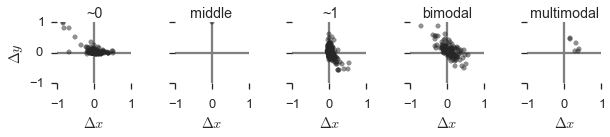

In [42]:
g = sns.FacetGrid(voyages_modalities, col='modality', #row='transition', margin_titles=True,
                  col_order=MODALITY_ORDER, size=2, aspect=.9)
g.map(plt.scatter, '$\Delta x$', '$\Delta y$', s=20, color='#262626', alpha=0.5)
# g.map(plt.hexbin, '$\Delta x$', '$\Delta y$', mincnt=1, bins='log', 
#       gridsize=50, extent=(-1, 1, -1, 1), vmax=3,
#       cmap='YlGnBu', edgecolor='darkgrey')

g.set_titles('{col_name}')
g.set(ylim=(-1, 1), xlim=(-1, 1), xticks=(-1, 0, 1), yticks=(-1, 0, 1))
for ax in g.axes.flat:
    ax.hlines(0, -1, 1, color='grey', zorder=-1)
    ax.vlines(0, -1, 1, color='grey', zorder=-1)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
#     collection = ax.collections[0]
#     try:
#         print 10**np.max(collection.get_array())
#     except TypeError:
#         continue
g.savefig('{}/voyage_space_per_modality.pdf'.format(voyages_folder))

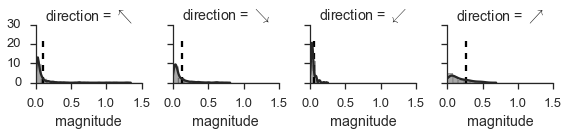

In [43]:
def plot_cutoff(x, cutoff_func, *args, **kwargs):
    ax = kwargs['ax'] if 'ax' in kwargs else plt.gca()
    ymin, ymax = ax.get_ylim()
    cutoff = cutoff_func(x)
    ax.vlines(cutoff, ymin, ymax, **kwargs)
    
g = sns.FacetGrid(voyages, col='direction', sharex=False, size=2)
g.map(sns.distplot, 'magnitude', bins=np.linspace(0, 1.5, 20), color='#262626')

# g = sns.FacetGrid(study.supplemental.voyages, col='direction', row='transition', margin_titles=True)
# g.map(sns.distplot, 'voyage_distance', color='teal', kde=True, bins=np.linspace(0, 1.5, 50))
g.map(plot_cutoff, 'magnitude', linestyle='--', color='k', cutoff_func=lambda x: x.quantile(0.8))
g.set(xlim=(0, 1.5))
for ax in g.axes.flat:
    ax.locator_params(nbins=4)
g.savefig('{}/voyages_histogram_facetgrid.pdf'.format(voyages_folder))

In [44]:
voyages.groupby('direction').size()

direction
$\nearrow$    149
$\nwarrow$    545
$\searrow$    509
$\swarrow$    264
dtype: int64

In [45]:
grouped = voyages.groupby('direction', as_index=False, group_keys=False)
voyages_filtered = grouped.apply(lambda x: x.loc[x['magnitude'] > x['magnitude'].quantile(0.8)])
voyages_filtered.groupby('direction').size()

direction
$\nearrow$     30
$\nwarrow$    109
$\searrow$    102
$\swarrow$     53
dtype: int64

In [46]:
voyage_events = set(voyages_filtered.event_id)
len(voyage_events)

294

In [48]:
study.supplemental.waypoints = study.supplemental.waypoints.set_index('Unnamed: 1', append=True)

In [51]:
study.supplemental.waypoints = study.supplemental.waypoints.reset_index()
study.supplemental.waypoints.head()

,phenotype,Unnamed: 1,0,1
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,1.00
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,1.00
2,MN,exon:chr10:103348089-103348157:+@exon:chr10:10...,0.000000,1.00
3,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.798855,0.05
4,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.042045,0.95


In [53]:
voyages_filtered.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
60,exon:chr10:105156166-105156198:-@exon:chr10:10...,0.334281,0.018868,0.334813,iPSC,MN,$\nearrow$,iPSC-MN,~0,~0
455,exon:chr11:134119061-134119156:-@exon:chr11:13...,0.165695,0.450739,0.480229,iPSC,MN,$\nearrow$,iPSC-MN,multimodal,bimodal
1127,exon:chr12:31478958-31479050:-@exon:chr12:3145...,0.517984,0.045455,0.519974,iPSC,MN,$\nearrow$,iPSC-MN,~0,bimodal
1273,exon:chr12:53861005-53861077:+@exon:chr12:5386...,0.267243,0.185731,0.325446,iPSC,MN,$\nearrow$,iPSC-MN,bimodal,bimodal
1756,exon:chr14:21737457-21737548:-@exon:chr14:2173...,0.086246,0.529178,0.536160,iPSC,MN,$\nearrow$,iPSC-MN,~1,bimodal


In [71]:
waypoints = study.supplemental.waypoints.rename(
    columns={'Unnamed: 1': 'event_id', '0': '~0', '1': '~1'})
waypoints = waypoints.merge(voyages_filtered, left_on=['event_id', 'phenotype'], right_on=['event_id', 'group1'])
waypoints.head()

,phenotype,event_id,~0,~1,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
0,iPSC,exon:chr10:105156166-105156198:-@exon:chr10:10...,0.347959,0.000000,0.334281,0.018868,0.334813,iPSC,MN,$\nearrow$,iPSC-MN,~0,~0
1,iPSC,exon:chr10:1094804-1094875:-@exon:chr10:108993...,0.075080,0.410714,0.225241,-0.125000,0.257601,iPSC,MN,$\searrow$,iPSC-MN,bimodal,bimodal
2,iPSC,exon:chr10:112328696-112328771:+@exon:chr10:11...,0.000000,0.896552,0.000000,0.103448,0.103448,iPSC,MN,$\nwarrow$,iPSC-MN,~1,~1
3,iPSC,exon:chr10:116247717-116247752:-@exon:chr10:11...,0.134544,0.800000,-0.134544,0.200000,0.241044,iPSC,MN,$\nwarrow$,iPSC-MN,bimodal,~1
4,iPSC,exon:chr10:120101782-120101827:-@exon:chr10:12...,0.178373,0.545455,0.164216,-0.249158,0.298407,iPSC,MN,$\searrow$,iPSC-MN,bimodal,bimodal


In [78]:
sns.set(style='ticks', context='paper')

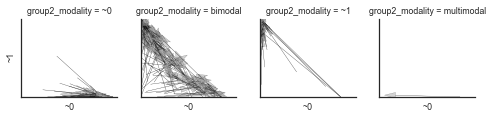

In [88]:
def arrowplot(xs, ys, dxs, dys, **kwargs):
    ax = plt.gca()
    for x, y, dx, dy in zip(xs, ys, dxs, dys):
        ax.arrow(x, y, dx, dy, facecolor='darkgrey', alpha=0.5, head_width=.075)

g = sns.FacetGrid(waypoints, col='group2_modality', size=2, aspect=.9)
g.map(arrowplot, '~0', '~1', '$\Delta x$', '$\Delta y$')
g.set(xticks=[], yticks=[])
g.savefig('{}/large_changes_events_arrowplot_per_final_modality.pdf'.format(voyages_folder))
# for ax in g.axes.flat:
#     ax.locator_params(nbins=)

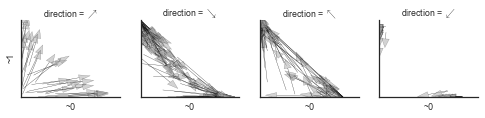

In [89]:
g = sns.FacetGrid(waypoints, col='direction', size=2, aspect=.9)
g.map(arrowplot, '~0', '~1', '$\Delta x$', '$\Delta y$')
g.set(xticks=[], yticks=[])
g.savefig('{}/large_changes_events_arrowplot_per_direction.pdf'.format(voyages_folder))
# for ax in g.axes.flat:
#     ax.locator_params(nbins=)

### PCA of non-differentially expressed (non-DE) genes

In [110]:
pca_folder = '{}/pca_non_de_genes'.format(figure_folder)
! mkdir $pca_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/pca_non_de_genes': File exists


### Non-differentially expressed genes

In [111]:
from flotilla.compute.expression import differential_expression
singles_no_outliers = study.expression.singles.ix[study.splicing.singles.index.difference(study.splicing.outliers.index)]
print singles_no_outliers.shape
de_results = differential_expression(singles_no_outliers, study.sample_id_to_phenotype)

(181, 16028)


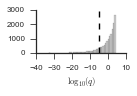

In [112]:
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

p_cutoff = 1e-5

fig, ax = plt.subplots(figsize=(2, 1.5))
sns.distplot(np.log10(de_results.bonferonni_p_value), ax=ax, kde=False, color='grey')
ax.set(xlabel='$\log_{10}(q)$')
ymin, ymax = ax.get_ylim()
ax.vlines(np.log10(p_cutoff), ymin, ymax, linestyle='dashed')

ax.locator_params(nbins=5)
sns.despine()
fig.tight_layout()
fig.savefig('{}/differential_expression_bonferonni_p_value.pdf'.format(pca_folder))

In [113]:
non_de_genes = de_results.gene_id[de_results.bonferonni_p_value >= p_cutoff]
de_genes = de_results.gene_id[de_results.bonferonni_p_value < p_cutoff]
print len(non_de_genes)
print len(de_genes)

13252
2776


#### Check modalities of DE and non-DE genes - redo these figures once barplot factorplot size is fixed

In [114]:
event_ind = study.splicing.feature_data.ensembl_id.map(
    lambda x: non_de_genes.isin(x.split(',')).any() if isinstance(x, str) else False)

non_de_event_names = study.splicing.feature_data.index[event_ind]
print len(non_de_event_names)

25345


In [115]:
modalities_non_de = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.event_name.isin(non_de_event_names)]
modalities_de = study.supplemental.modalities_tidy.loc[~study.supplemental.modalities_tidy.event_name.isin(non_de_event_names)]

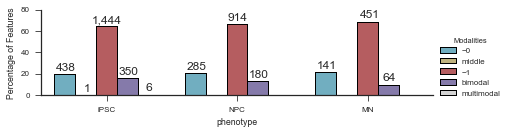

In [116]:
import anchor
g = anchor.barplot(modalities_de, x='phenotype', hue='modality', x_order=study.phenotype_order, size=2)
g.savefig('{}/de_genes_modalities.pdf'.format(pca_folder))

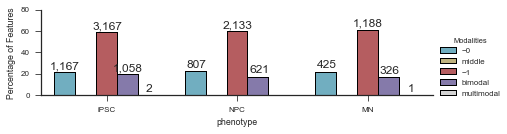

In [117]:
g = anchor.barplot(modalities_non_de, x='phenotype', hue='modality', x_order=study.phenotype_order, size=2)
g.savefig('{}/non_de_genes_modalities.pdf'.format(pca_folder))

#### PCA of DE and non-DE genes

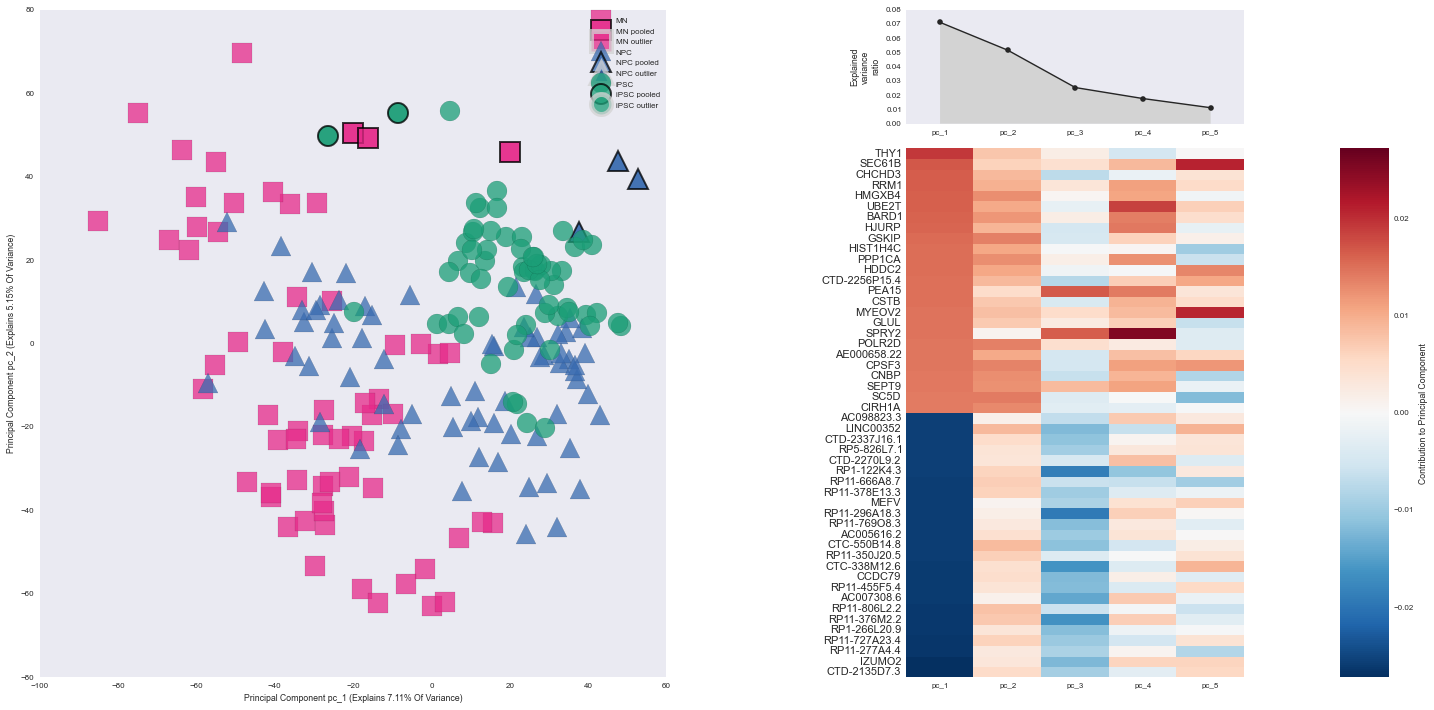

In [118]:
with sns.axes_style('dark'):
    v = study.plot_pca(feature_subset=non_de_genes,
                       sample_subset='~outlier', scale_by_variance=False, show_vectors=False, markersize=20)
    v.fig_reduced.savefig('{}/non_de_genes_expression_pca.pdf'.format(pca_folder))

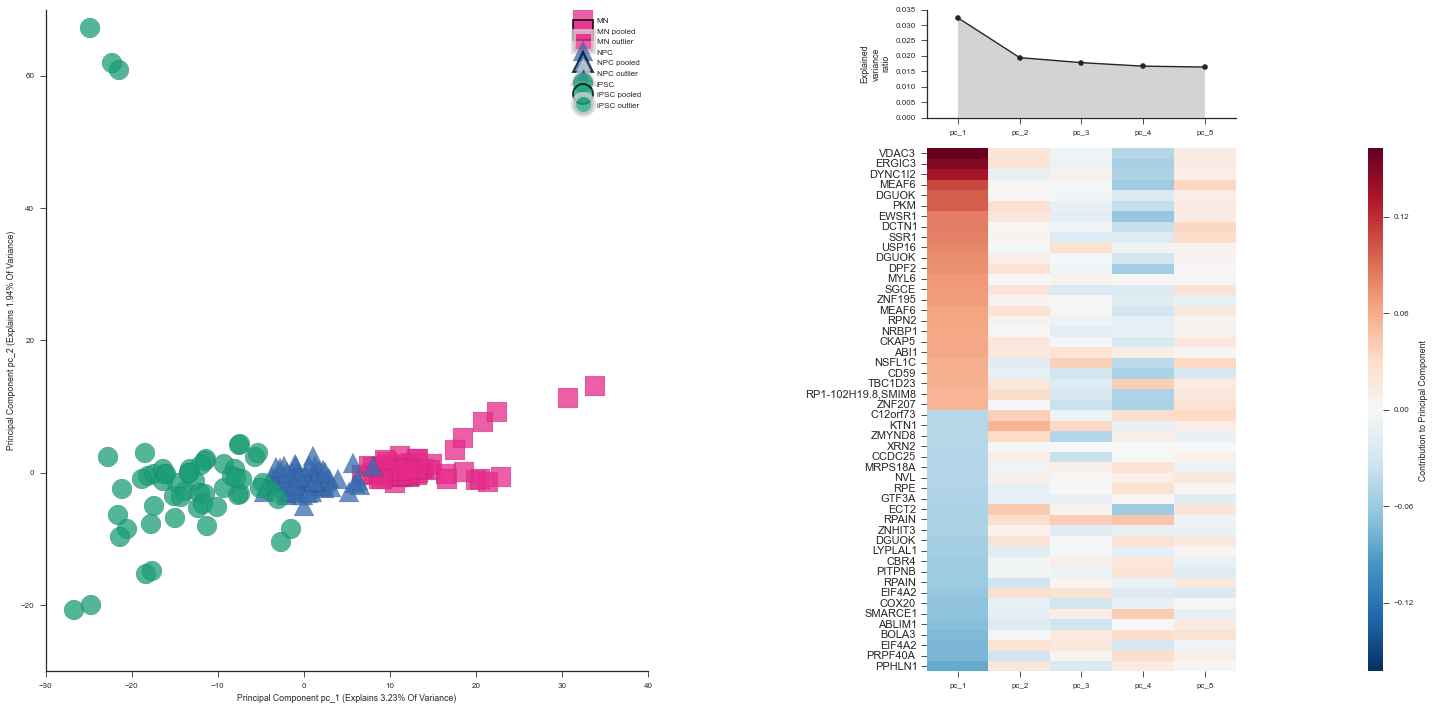

In [119]:
viz = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing',
                     sample_subset=singles_not_outliers, 
                     show_vectors=False, scale_by_variance=True, markersize=20)
viz.fig_reduced.savefig('{}/non_de_genes_splicing_pca.pdf'.format(pca_folder))

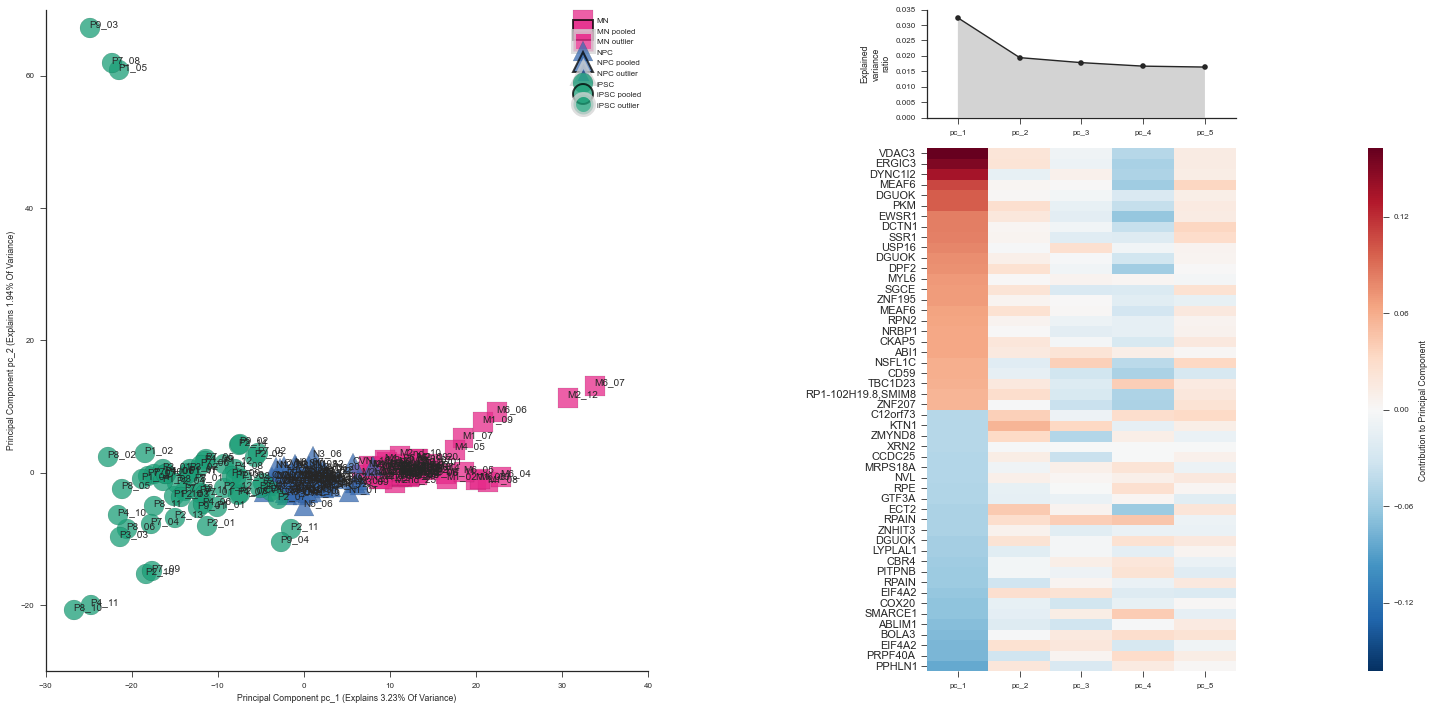

In [120]:
viz = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing',
                     sample_subset=singles_not_outliers, show_point_labels=True,
                     show_vectors=False, scale_by_variance=True, markersize=20)
viz.fig_reduced.savefig('{}/non_de_genes_splicing_pca_labeled.pdf'.format(pca_folder))


Get events that change along PC1

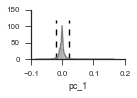

In [121]:
pc1 = viz.components_.loc['pc_1']
std = pc1.std()
cutoff = 2*std

fig, ax = plt.subplots(figsize=(2, 1.5))
sns.distplot(pc1, color='grey')
ymin, ymax = ax.get_ylim()

ax.vlines(-cutoff, ymin, ymax, linestyle='--', color='k')
ax.vlines(cutoff, ymin, ymax, linestyle='--', color='k')
sns.despine()
ax.locator_params(nbins=4)
fig.tight_layout()
fig.savefig('{}/non_de_genes_splicing_pca_pc1_components.pdf'.format(pca_folder))

In [122]:
pca_events = set(pc1.index[pc1.abs() > cutoff])
len(pca_events)

423

## Venn diagrams

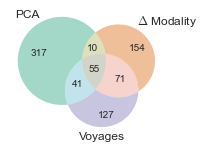

In [123]:
import matplotlib_venn

fig, ax = plt.subplots(figsize=(2.5, 2.5))

matplotlib_venn.venn3((pca_events, delta_modality_events, voyage_events), 
                      set_labels=('PCA', '$\Delta$ Modality', 'Voyages'),
                      set_colors=sns.color_palette('Dark2', n_colors=3))
fig.tight_layout()
fig.savefig('{}/changing_events_voyage_modality_pca_venn.pdf'.format(folder))

## Events changing in 2 or more methods (Tier 1)

In [124]:
from collections import Counter

n_methods_changing = Counter(voyage_events)
n_methods_changing.update(delta_modality_events)
n_methods_changing.update(pca_events)
n_methods_changing = pd.Series(n_methods_changing)
n_methods_changing.head()

exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+    1
exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+    1
exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-    1
exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563492-103563776:-    1
exon:chr10:104209950-104210087:+@exon:chr10:104211156-104211312:+@exon:chr10:104215094-104215184:+    1
dtype: int64

In [125]:
tier1 = n_methods_changing[n_methods_changing >= 2].index
print len(tier1)
tier2 = n_methods_changing[n_methods_changing == 1].index
print len(tier2)

177
598


In [126]:
changing_events = n_methods_changing.index
print len(changing_events)

775


### Add to Splicing feature data and save

In [127]:
background = set(modalities_ipsc_mn.event_name)

In [128]:
study.splicing.feature_data.loc[background, 'Changing Events'] = 'Background'
study.splicing.feature_data.loc[changing_events, 'Changing Events'] = 'Foreground'


study.splicing.feature_data.loc[background, 'Strict Changing Events'] = 'Background'
study.splicing.feature_data.loc[tier1, 'Strict Changing Events'] = 'Foreground'

In [129]:
study.save('singlecell_pnm_figure4_voyages_changing_events', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages_changing_events/datapackage.json


## Plot all changing events

In [53]:
changing_events_folder = '{}/changing_events'.format(figure_folder)
! mkdir $changing_events_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/changing_events': File exists


In [ ]:
# tier1_folder = '{}/tier1'.format(figure_folder)
# ! mkdir $tier1_folder

### Clustering of changing events

In [45]:
sns.set(context='paper', style='whitegrid')

In [46]:
study.phenotype_to_color

{'MN': u'#e62a8a', 'NPC': u'#396bb0', 'iPSC': u'#1b9e77', 'sMN': u'#fdc086'}

In [64]:
f

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/changing_events/changing_events
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/changing_events/strict_changing_events


In [63]:
ls /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/changing_events

^C

In [60]:
new_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/changing_events/strict_changing_events'

In [ ]:
for changing_events_col in changing_events_cols:
    changing_events = study.splicing.feature_data.index[study.splicing.feature_data[changing_events_col] == 'Foreground']
    
    data = study.splicing.data.loc[:, changing_events]
    mask = data.isnull()
    data = data.fillna(0.5)

    sample_colors = study.sample_id_to_color[data.index]
    pooled_outlier = ['black' if x in study.pooled else 'lightgrey' if x in 
                      study.expression.outlier_samples else 'white' for x in data.index]
    row_colors = [sample_colors, pooled_outlier]

    xticklabels = study.splicing.feature_data['gene_name'][data.columns]

    g = sns.clustermap(data.T, mask=mask.T, cmap='RdYlBu_r', center=0.5, col_colors=row_colors)#, figsize=(5, 30))
    g.ax_heatmap.set(yticklabels=[], xticks=[])
    g.ax_col_colors.set(xticks=[], yticks=[]);
    g.savefig('{}/psi_clustermap.pdf'.format(folderize(changing_events_col)))

### PCA of changing events

Index([u'CVN_01', u'CVN_02', u'CVN_03', u'CVN_04', u'CVN_05'], dtype='object')


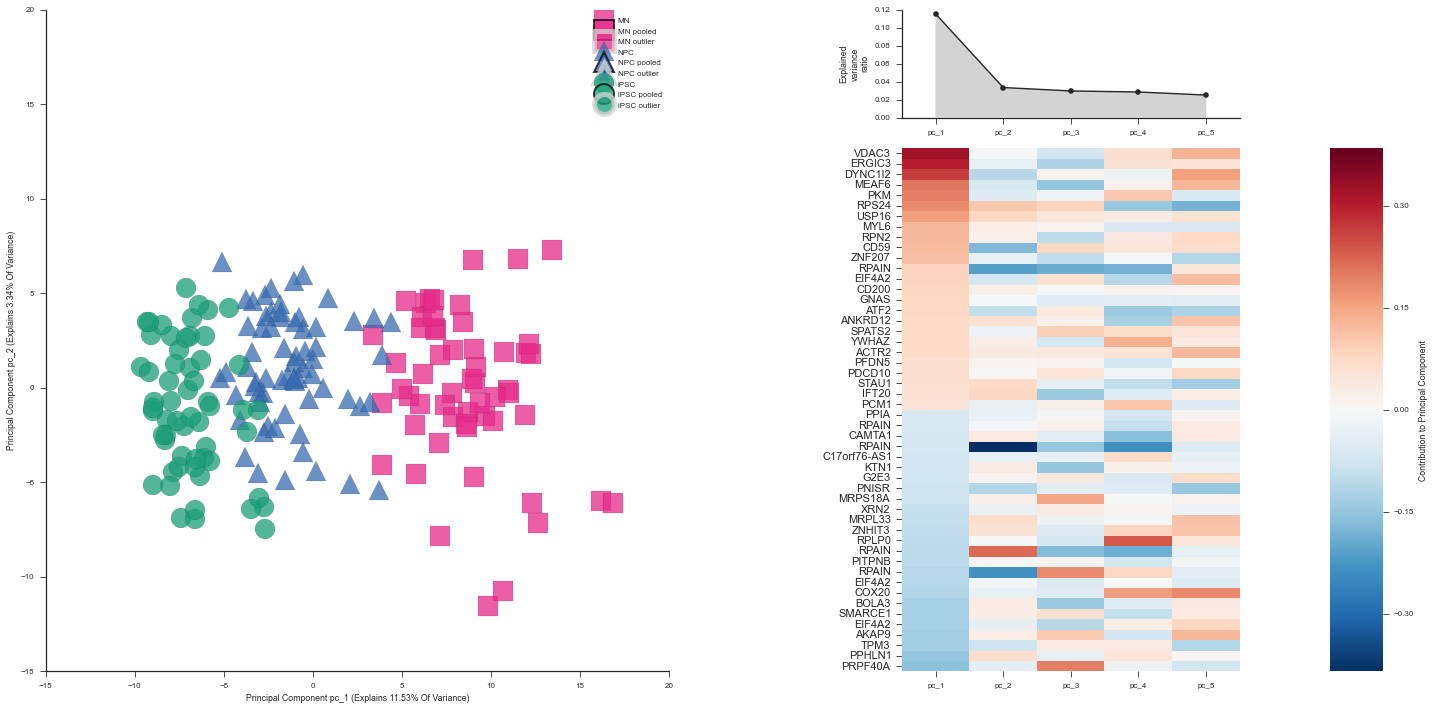

In [37]:
singles_not_outliers = study.sample_subset_to_sample_ids('~pooled') & study.sample_subset_to_sample_ids('~outlier')
print singles_not_outliers[:5]

for changing_events_col in changing_events_cols:
    changing_events = study.splicing.feature_data.index[study.splicing.feature_data[changing_events_col] == 'Foreground']
    
    viz = study.plot_pca(feature_subset=changing_events, data_type='splicing', markersize=20,
                         sample_subset=singles_not_outliers, show_vectors=False, scale_by_variance=True)
    xmin, xmax, ymin, ymax = viz.ax_components.axis()
    vmin = min(xmin, ymin)
    vmax = max(xmax, ymax)
    viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
    viz.fig_reduced.savefig('{}/splicing_pca.pdf'.format(folderize(changing_events_col)))

Index([u'CVN_01', u'CVN_02', u'CVN_03', u'CVN_04', u'CVN_05'], dtype='object')


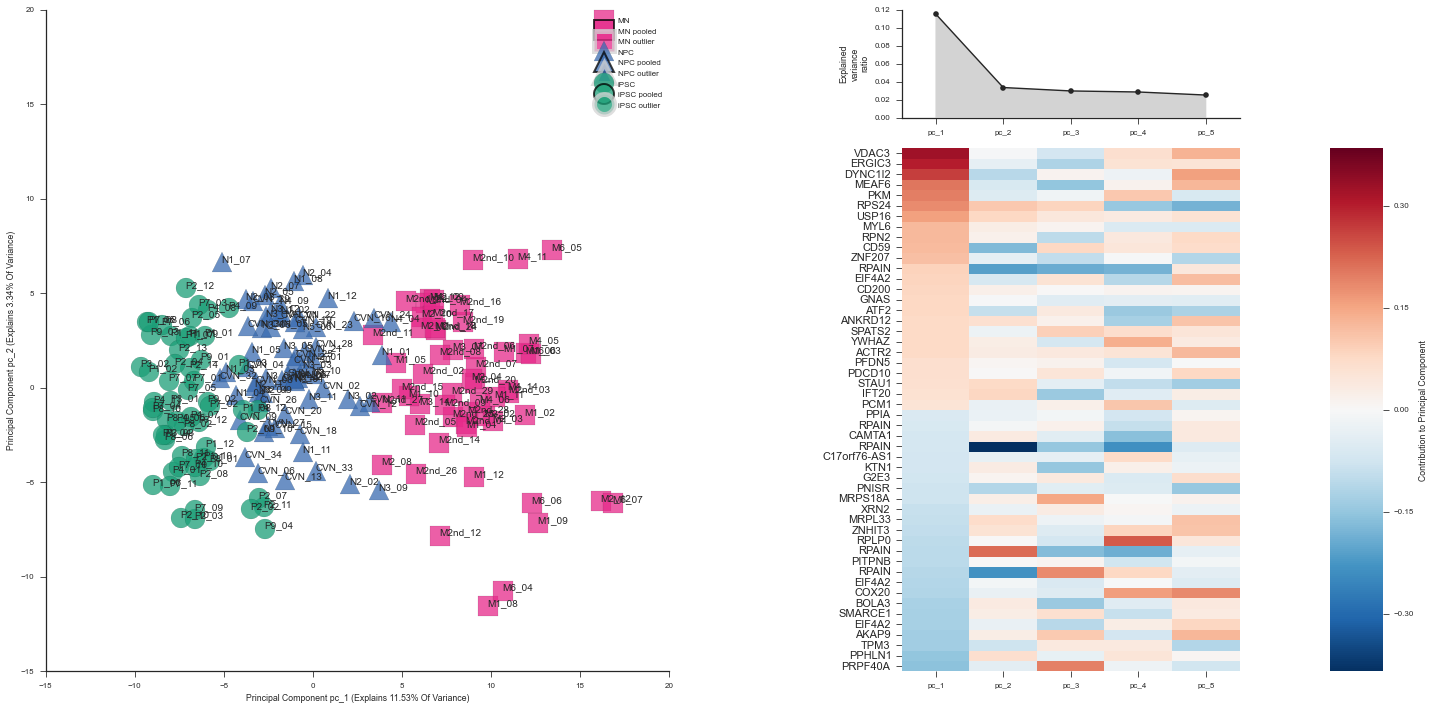

In [64]:
singles_not_outliers = study.sample_subset_to_sample_ids('~pooled') & study.sample_subset_to_sample_ids('~outlier')
print singles_not_outliers[:5]


for changing_events_col in changing_events_cols:
    changing_events = study.splicing.feature_data.index[study.splicing.feature_data[changing_events_col] == 'Foreground']

    viz = study.plot_pca(feature_subset=tier1, data_type='splicing', markersize=20, show_point_labels=True,
                         sample_subset=singles_not_outliers, show_vectors=False, scale_by_variance=True)
    xmin, xmax, ymin, ymax = viz.ax_components.axis()
    vmin = min(xmin, ymin)
    vmax = max(xmax, ymax)
    viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
    viz.fig_reduced.savefig('{}/changing_events_voyage_modality_pca_tier1_pca_labeled.pdf'.format(tier1_folder))

In [38]:
background = set(modalities_ipsc_mn.event_name)

In [39]:
study.splicing.feature_data.loc[background, 'Changing Events'] = 'Background'
study.splicing.feature_data.loc[tier2, 'Changing Events'] = 'Tier 2'
study.splicing.feature_data.loc[tier1, 'Changing Events'] = 'Tier 1'

In [40]:
study.splicing.feature_data.groupby('Changing Events').size()

Changing Events
Background    6995
Tier 1         180
Tier 2         773
dtype: int64

## Features of changing events

### Assign feature data

In [41]:
feature_data = study.splicing.feature_data.join(voyages.set_index('event_id')['direction'])

In [42]:
X = 'Changing Events'

### Boolean features

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/boolean_features': File exists


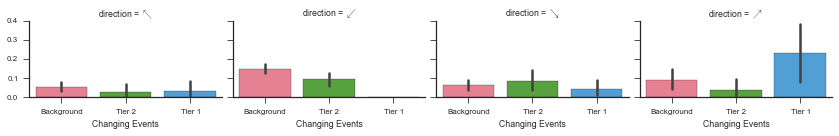

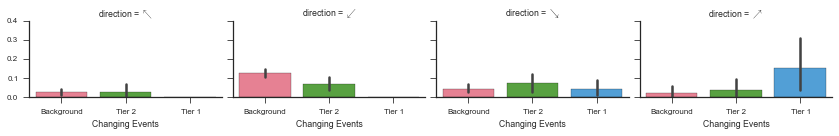

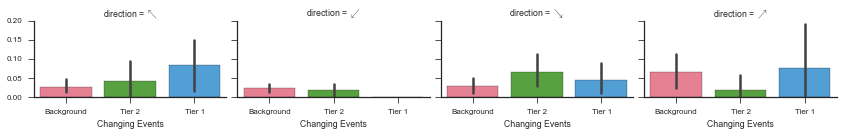

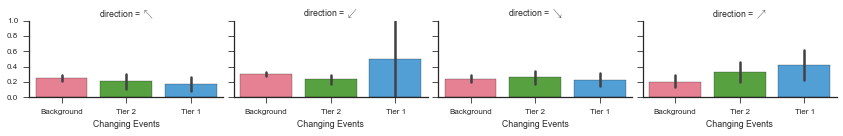

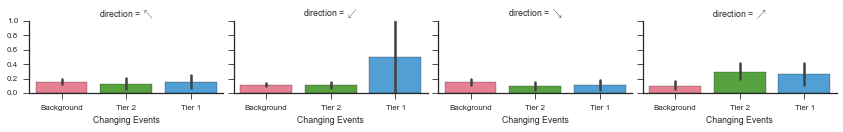

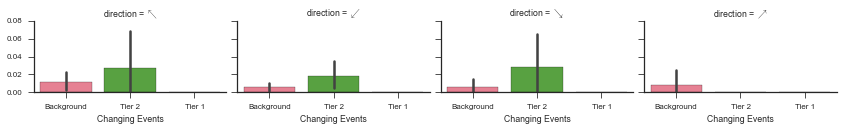

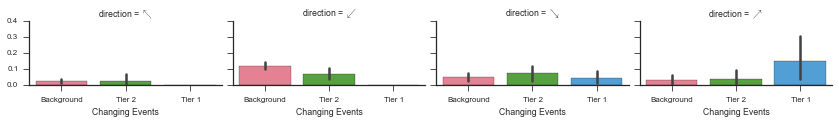

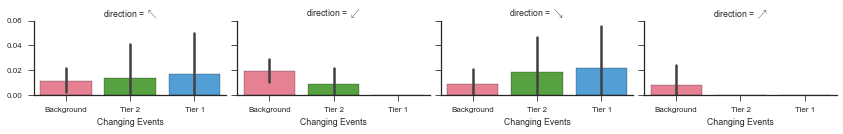

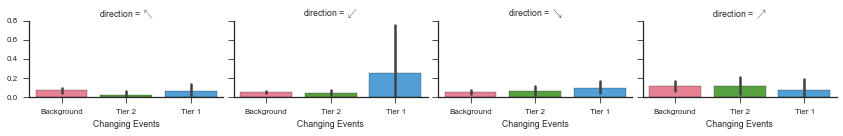

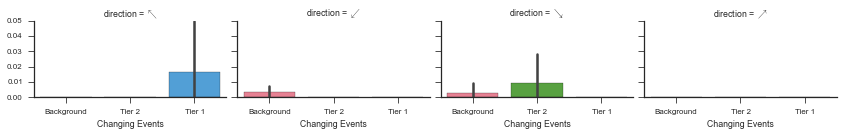

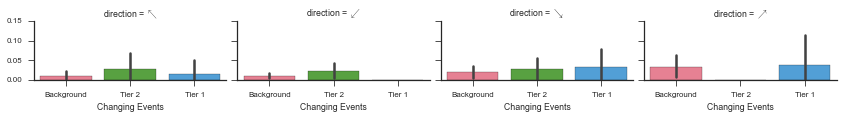

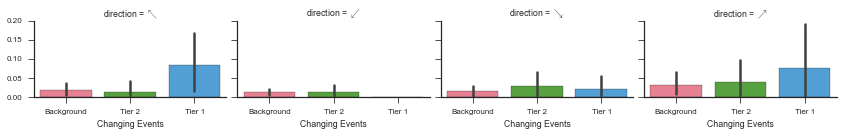

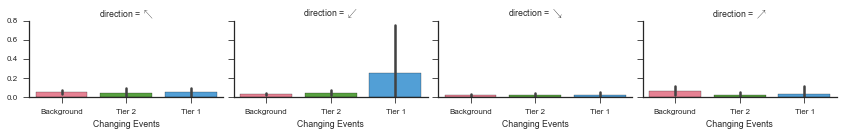

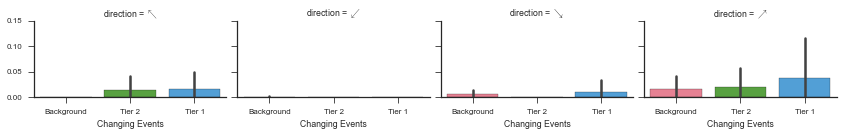

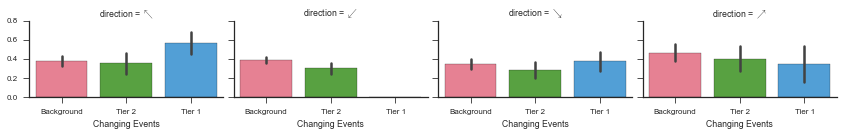

In [66]:
boolean_feature_folder = '{}/boolean_features'.format(figure_folder)
!mkdir $boolean_feature_folder

boolean_cols = ['ribosomal', 'ribosomal_subunit', 'gerstberger2014_tf',
        'gerstberger2014_rbp', 'gerstberger2014_rbp_target_mrna',  'gerstberger2014_rbp_target_ncrna',
        'gerstberger2014_rbp_target_ribosome', 'gerstberger2014_rbp_target_trna',
       'cell_cycle', 'cell_surface_markers', 'bioguo_animaltfdb_chromatin_remodeler', 'bioguo_animaltfdb_tf',
       'bioguo_animaltfdb_cofactor', 'exon2_merkin2012_ancient', 'exon2_divisible_by_3']

for col in boolean_cols:
    g = sns.factorplot(y=col, x=X, #hue='Polarization', 
                       data=feature_data, col='direction',
                       aspect=1.5, kind='bar', size=2, palette='husl')
    for ax in g.axes.flat:
        ax.locator_params('y', nbins=5)
#         ax.set(ylabel='')
#     g.fig.tight_layout()
    g.set(ylabel='')
    g.savefig('{}/{}.pdf'.format(boolean_feature_folder, col))
    
#     p_values = pd.DataFrame(index=hue_order, columns=study.phenotype_order)
#     for modality in hue_order:
#         for phenotype in study.phenotype_order:
#             M = n_events[phenotype]
#             N = n_events_in_modality[phenotype, modality]
#             n = study.splicing.feature_data.loc[events[phenotype], col].sum()
#             x = study.splicing.feature_data.loc[events_in_modality[phenotype, modality], col].sum()

#             p_values.loc[modality, phenotype] = hypergeom.sf(x, M, n, N)
#     p_values = p_values.astype(float)
    
#     heatmap_ax = axes_iter.next()
#     plt.sca(heatmap_ax)
#     sns.heatmap(-np.log10(p_values), annot=True, mask=p_values > 0.05, 
#                 cbar_kws=dict(label='$-\log_{10} p$'), ax=heatmap_ax)
#     locations, labels = plt.yticks()
#     plt.setp(labels, rotation=0)
#     heatmap_ax.set(title=col)
# heatmap_fig.tight_layout()
# heatmap_fig.savefig('{}/p_values.pdf'.format(booelan_feature_folder))

### Numeric data

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/numeric_features': File exists


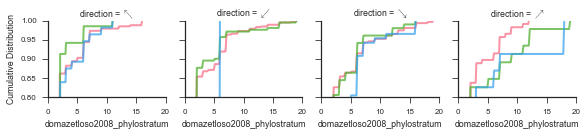

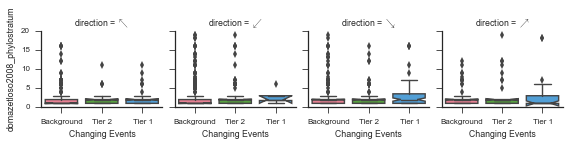

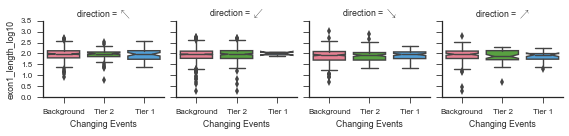

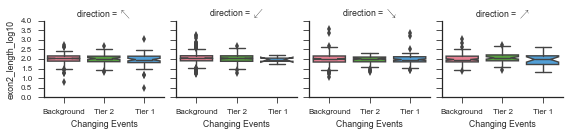

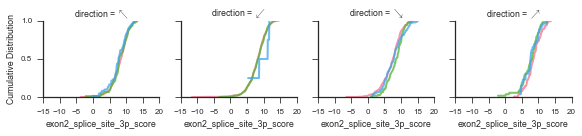

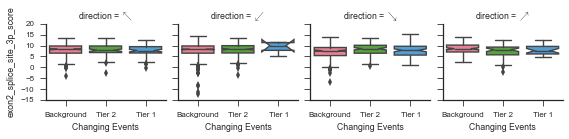

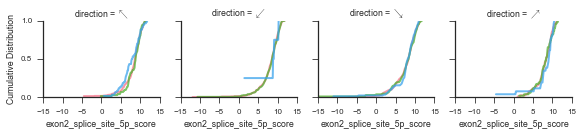

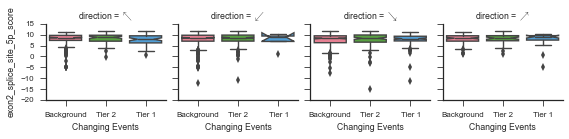

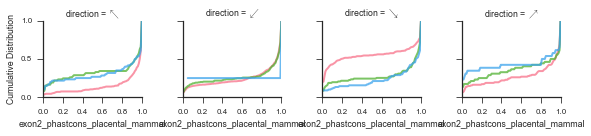

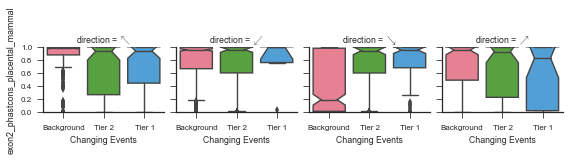

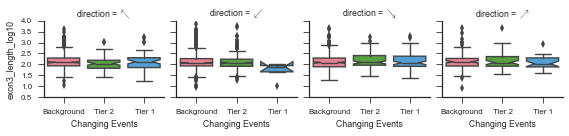

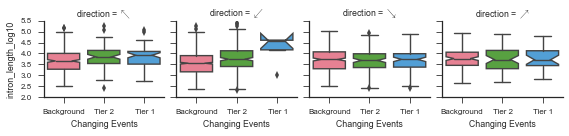

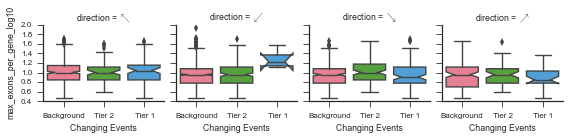

In [67]:


from flotilla.visualize.generic import cdfplot
numeric_features_folder = '{}/numeric_features'.format(figure_folder)
! mkdir $numeric_features_folder


numerical_cols = [#'log2(TPM+1)', 
#         'expression_var_log2_plus1', 
#         'expression_mean_log2_plus1',
        'domazetloso2008_phylostratum',
        'exon1_length',
        'exon2_length',
        'exon2_splice_site_3p_score',
        'exon2_splice_site_5p_score',
        'exon2_phastcons_placental_mammal',
        'exon3_length',
        'intron_length',
        'max_exons_per_gene']


log10_cols = ['max_exons_per_gene', 'intron_length', 
             'isoform1_molecular_weight', 'isoform2_molecular_weight', 'expression_var', 
              'exon1_length', 'exon2_length', 'exon3_length']
cdf_cols = ['domazetloso2008_phylostratum', 
             'isoform1_gc_position2',
             'isoform1_gc_position3',
             'isoform2_gc',
             'isoform2_gc_position1',
             'isoform2_gc_position2',
             'isoform2_gc_position3',
            'exon2_splice_site_3p_score', 
            'exon2_splice_site_5p_score', 
            'exon2_phastcons_placental_mammal']
log10s = True, False

plots = 'cdf', 'box'

hue_order = ['~0', 'bimodal', '~1', 'multimodal']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]
nrows = len(numerical_cols)
# heatmap_fig, heatmap_axes = plt.subplots(figsize=(12, 2.5*nrows), nrows=nrows, sharex=True, sharey=True)
# axes_iter = heatmap_axes.flat

for col in numerical_cols:
    for log10 in log10s:
        for plot in plots:
            suffix = '' if not log10 else '_log10'
            pdf = '{}/{}_{}{}.pdf'.format(numeric_features_folder, col, plot, suffix)
#             if os.path.exists(pdf):
#                 continue
                
            if log10 and col not in log10_cols:
                continue
            if not log10 and col in log10_cols:
                continue
            if plot == 'cdf':
                if col not in cdf_cols:
                    continue
                g = sns.FacetGrid(feature_data, hue=X, size=2, col='direction',
                                  legend_out=True, palette='husl')
                g.map(flotilla.visualize.generic.cdfplot, col, log=log10, alpha=0.75, linewidth=2)
                g.set(ylim=(0, 1))
                if col == 'domazetloso2008_phylostratum':
                    g.set(ylim=(0.8, 1))
                for ax in g.axes.flat:
                    if ax.is_first_col():
                        ax.locator_params('y', nbins=4)
                        ax.set_ylabel('Cumulative Distribution')
            else:
                log_col = col + '_log10' if log10 else col
                if log10:
                    feature_data[log_col] = np.log10(feature_data[col]).astype(float)
                
                # Which column to plot
                plot_col = log_col if log10 else col
                g = sns.factorplot(y=log_col, x=X, data=feature_data,
                                   kind=plot, size=2, col='direction',
                                   notch=True, palette='husl')
            g.savefig(pdf)

### Isoform numeric features

In [45]:
isoform_cols = [x.replace('1_', '{}_') for x in feature_data.columns if x.startswith('isoform1')]
isoform_cols

['isoform{}_gc',
 'isoform{}_gc_position1',
 'isoform{}_gc_position2',
 'isoform{}_gc_position3',
 'isoform{}_translation',
 'isoform{}_gravy',
 'isoform{}_isoelectric_point',
 'isoform{}_instability_index',
 'isoform{}_molecular_weight',
 'isoform{}_protein_secondary_structure_helix',
 'isoform{}_protein_secondary_structure_sheet',
 'isoform{}_protein_secondary_structure_turn',
 'isoform{}_aromaticity',
 'isoform{}_iupred_score',
 'isoform{}_pfam_accession',
 'isoform{}_pfam_go_id',
 'isoform{}_pfam_go_name',
 'isoform{}_pfam_name']

In [71]:
X

'Changing Events'

In [72]:
feature_data.groupby([X, 'direction']).size()

Changing Events  direction 
Background       $\nearrow$    123
                 $\nwarrow$    360
                 $\searrow$    332
                 $\swarrow$    918
Tier 1           $\nearrow$     26
                 $\nwarrow$     60
                 $\searrow$     90
                 $\swarrow$      4
Tier 2           $\nearrow$     52
                 $\nwarrow$     73
                 $\searrow$    107
                 $\swarrow$    226
dtype: int64

In [46]:
feature_data_index = feature_data.set_index([X, 'direction'])

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/isoform_features': File exists


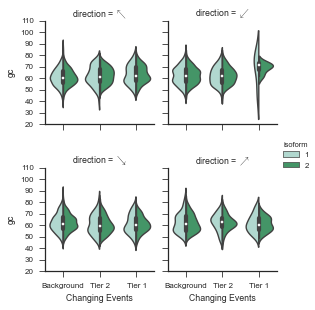

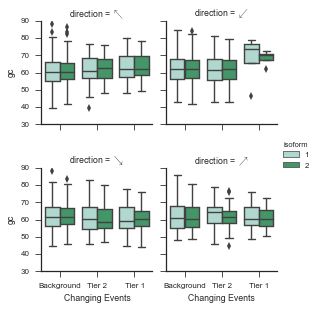

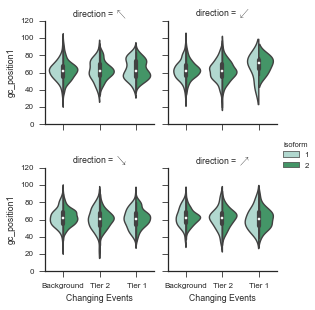

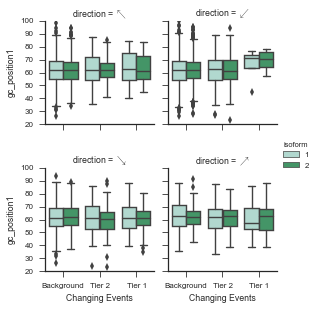

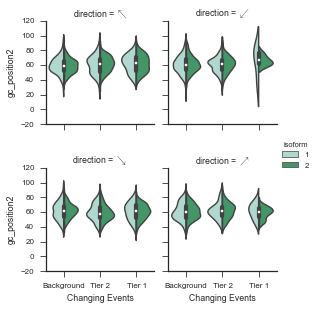

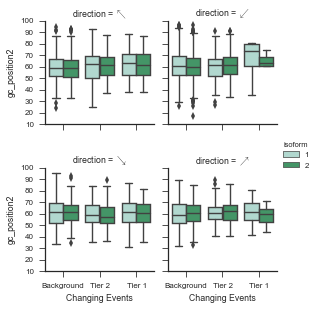

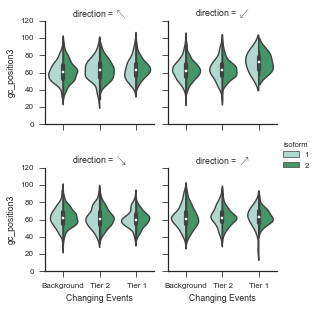

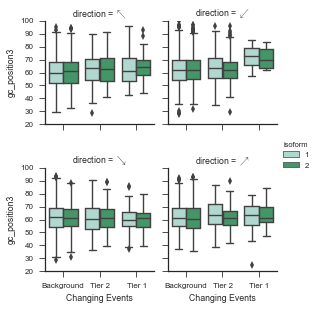

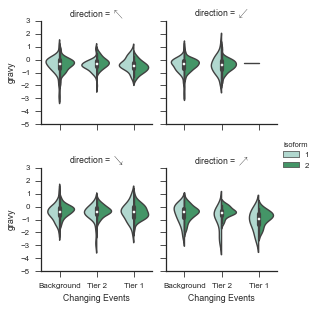

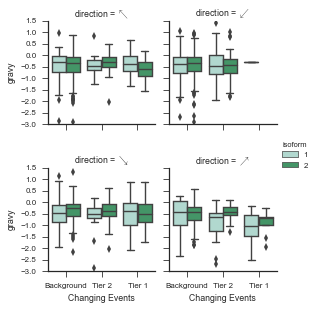

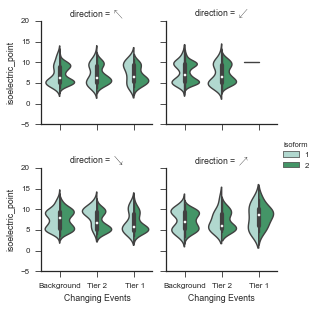

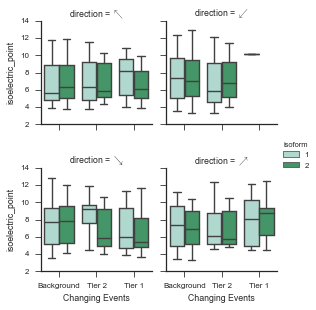

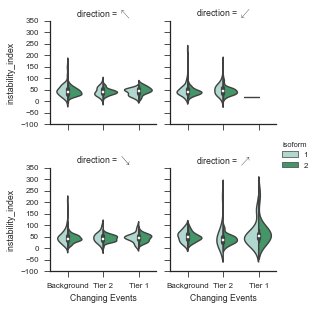

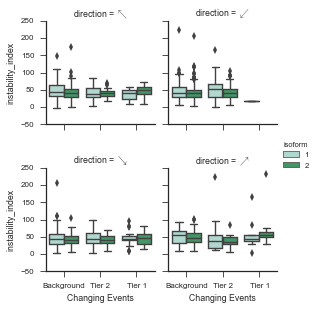

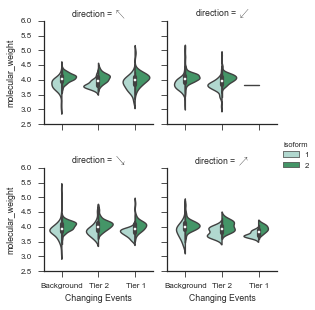

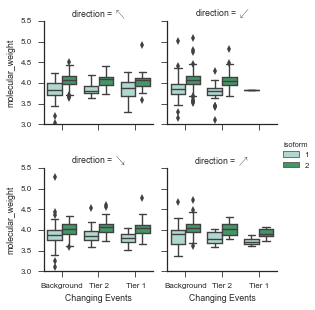

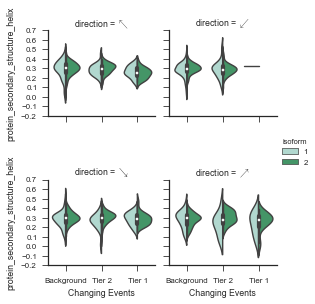

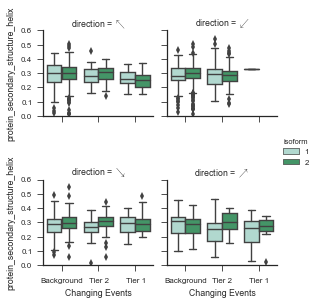

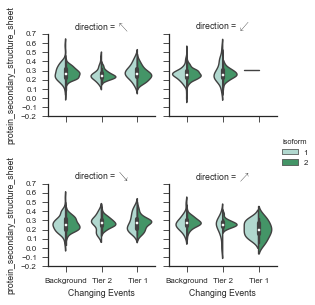

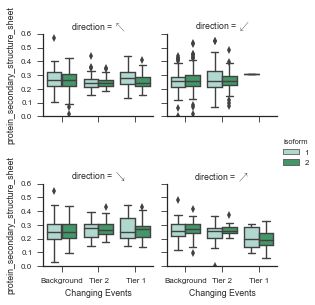

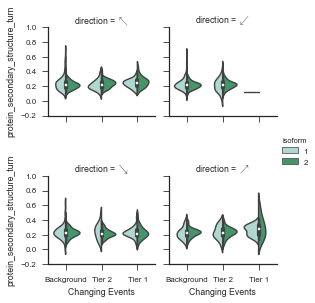

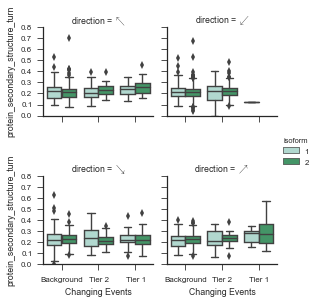

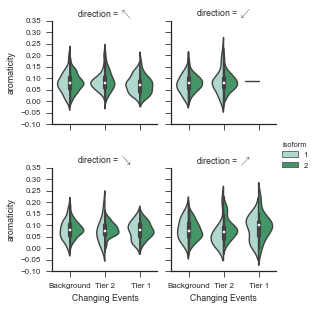

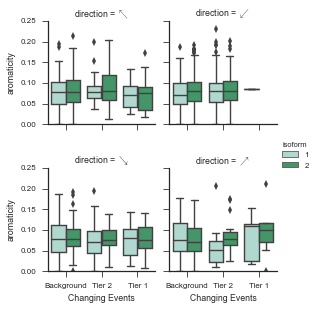

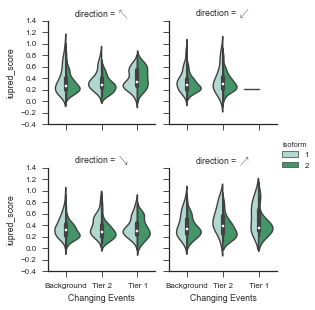

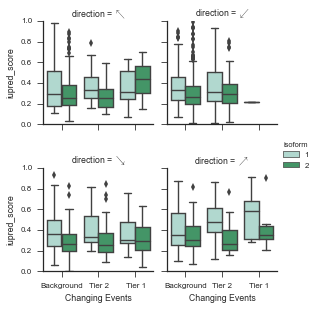

In [73]:
isoform_figure_folder = '{}/isoform_features'.format(folder)
! mkdir $isoform_figure_folder

non_numeric_cols = ['translation', 'pfam']

hue_order = '~0', 'bimodal', '~1'
palette = [MODALITY_TO_COLOR[m] for m in hue_order]


plot_kinds = 'violin', 'box'
for isoform_col in isoform_cols:
    if any(non_numeric in isoform_col for non_numeric in non_numeric_cols):
        continue
    
    x = isoform_col.format(1)
    y = isoform_col.format(2)
    
#     g = sns.FacetGrid(modalities_annotated, col='modality', row='phenotype', col_order=hue_order)
#     g.map(plt.hexbin, x, y, mincnt=1, gridsize=50, edgecolor=u'darkgrey')
#     g.set_titles("{col_name} {row_name}")
#     g.savefig('{}/modality_features_{}_hexbin.pdf'.format(folder, isoform_col.format('')))
    isoform1 = feature_data_index[x].reset_index()
    isoform2 = feature_data_index[y].reset_index()

    name = isoform_col.format('')
    isoform1 = isoform1.rename(columns={x:name})
    isoform2 = isoform2.rename(columns={y:name})

    isoform1['isoform'] = 1
    isoform2['isoform'] = 2
    df = pd.concat([isoform1, isoform2])

    if 'weight' in name:
        df[name] = np.log10(df[name])
        
    for kind in plot_kinds:
        if kind == 'violin':
            kwargs = dict(split=True)
        else:
            kwargs = dict(notch=False)
        g = sns.factorplot(hue='isoform', x=X, y=name, data=df, size=2, col='direction',
                           kind=kind, palette='BuGn',col_wrap=2, **kwargs)
        g.set_ylabels(name.replace('isoform_', ''))
        g.savefig('{}/{}_{}.pdf'.format(isoform_figure_folder, name, kind))

### Counting number of things (count-style figures)

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/count_style_figures': File exists


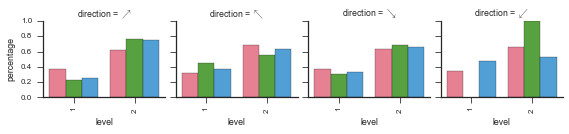

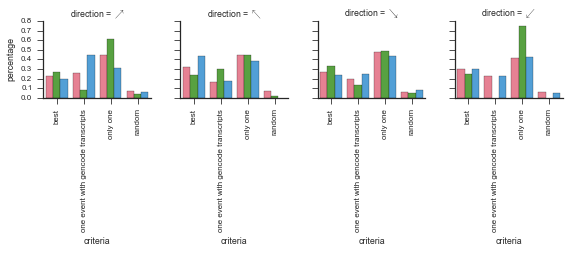

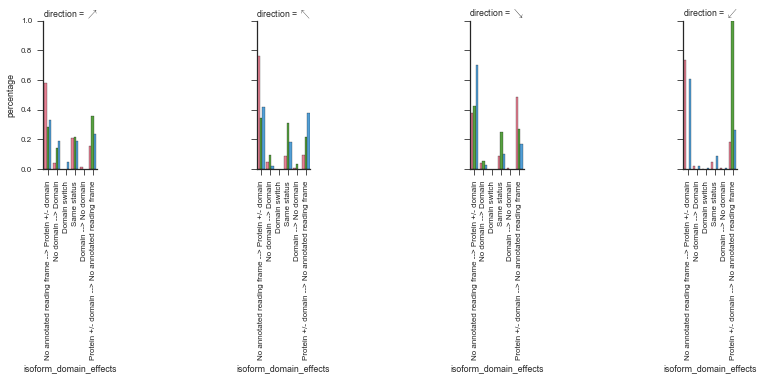

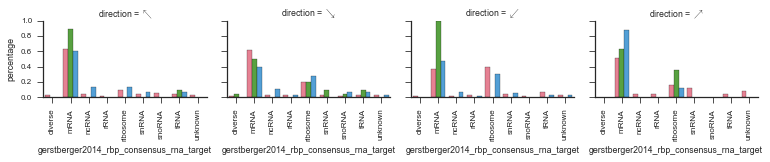

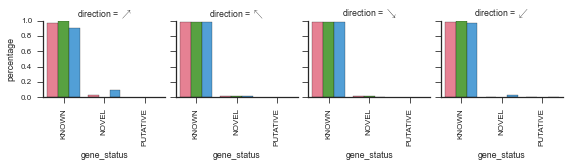

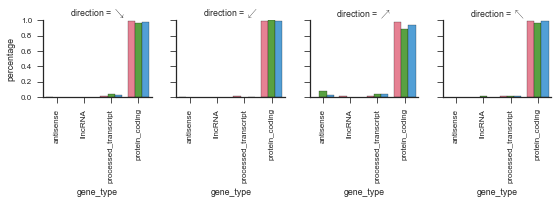

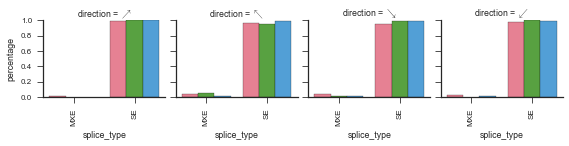

In [48]:
count_figure_folders = '{}/count_style_figures'.format(folder)
! mkdir $count_figure_folders

count_cols = ['level', 'criteria', u'isoform_domain_effects', 
              'gerstberger2014_rbp_consensus_rna_target', 'gene_status', 
              'gene_type', 'splice_type']

order = ['~0', 'bimodal', '~1']
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

for col in count_cols:
    s = feature_data.groupby([X, col, 'direction']).size()
    df = s.reset_index()
    df = df.rename(columns={0: 'count'})
    df['percentage'] = df.groupby([X, 'direction'])['count'].apply(lambda x: x/x.sum())
    if col == 'isoform_domain_effects':
        order = isoform_domain_effects_order
        palette = 'PRGn'
        size = 3
    else:
        order = None
        palette = 'husl'
        size = 2

#     print len(df[col].unique())
    g = sns.factorplot(hue=X, x=col, y='percentage', kind='bar',  data=df, col='direction',
                       size=size, order=order, palette='husl', legend=False,
                       aspect=max(1, len(df[col].unique())*0.15))
    for ax in g.axes.flat:
        xticklabels = map(lambda x: x.get_text(), ax.get_xticklabels())
        ax.set_xticklabels(xticklabels, rotation=90)
#     fig.tight_layout()
    g.savefig('{}/{}_barplot.pdf'.format(count_figure_folders, col))

## Kmers enriched in different tiers

In [49]:
study.supplemental.voyages.loc[study.supplemental.voyages['event_id'].isin(tier1), 'Tier'] = "Tier 1"
study.supplemental.voyages.loc[study.supplemental.voyages['event_id'].isin(tier2), 'Tier'] = "Tier 2"
study.supplemental.voyages.groupby('Tier').size()

Tier
Tier 1     504
Tier 2    1432
dtype: int64

In [50]:
study.supplemental.voyages.groupby(['Tier', 'direction']).size()

Tier    direction 
Tier 1  $\nearrow$     86
        $\nwarrow$    142
        $\searrow$    237
        $\swarrow$     39
Tier 2  $\nearrow$    161
        $\nwarrow$    278
        $\searrow$    345
        $\swarrow$    648
dtype: int64

In [51]:
from astrolabe.utils import remove_latex_chars_from_arrow

In [52]:
bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_changing_events'
! mkdir $bed_folder

mkdir: cannot create directory `/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_changing_events': File exists


In [53]:
background_events = background.copy()

In [54]:
exon2s = map(lambda x: x.split('@')[1], background_events)
exon2s

['exon:chr2:71588775-71588825:+',
 'exon:chr19:35752828-35752884:+',
 'exon:chr7:103006523-103006610:+',
 'exon:chr16:4393484-4393595:-',
 'exon:chr1:147408741-147408800:+',
 'exon:chr4:48839177-48839269:+',
 'exon:chr8:82597998-82598198:-',
 'exon:chr19:49949808-49949951:-',
 'exon:chr1:113464612-113464755:-',
 'exon:chr2:148676016-148676161:+',
 'exon:chr17:60685402-60685509:+',
 'exon:chr1:43130534-43130626:+',
 'exon:chr2:160585520-160585686:+',
 'exon:chr8:61484605-61484672:+',
 'exon:chr20:42242490-42242616:+',
 'exon:chr14:68156929-68157138:-',
 'exon:chr15:40241317-40241469:+',
 'exon:chr17:5014371-5014514:-',
 'exon:chr17:35980918-35980993:-',
 'exon:chr19:2234149-2234239:-',
 'exon:chr12:49580773-49580867:-',
 'exon:chr8:80915234-80915415:-',
 'exon:chr17:27041811-27041918:-',
 'exon:chrX:23886710-23886805:-',
 'exon:chr12:76467983-76468019:-',
 'exon:chr7:100865885-100866055:+',
 'exon:chr15:44062721-44062778:+',
 'exon:chr14:23609680-23609833:-',
 'exon:chr5:86700661-867008

In [55]:
from outrigger.region import Region

In [56]:
exon2_regions = map(Region, exon2s)

In [57]:
exon2_bed_table = pd.DataFrame(map(lambda x: [x.chrom, x._start, x._stop, x.name, 1000, x.strand], exon2_regions))
exon2_bed_table[3] = background_events
exon2_bed_table.head()

,0,1,2,3,4,5
0,chr2,71588775,71588825,exon:chr2:71582849-71582910:+@exon:chr2:715887...,1000,+
1,chr19,35752828,35752884,exon:chr19:35749848-35749967:+@exon:chr19:3575...,1000,+
2,chr7,103006523,103006610,exon:chr7:103004590-103004754:+@exon:chr7:1030...,1000,+
3,chr16,4393484,4393595,exon:chr16:4401233-4401263:-@exon:chr16:439348...,1000,-
4,chr1,147408741,147408800,exon:chr1:147400549-147400691:+@exon:chr1:1474...,1000,+


In [58]:
exon2_bed_table = exon2_bed_table.sort_values(by=3)
exon2_bed_table.head()

,0,1,2,3,4,5
2427,chr10,101163481,101163631,exon:chr10:101165513-101165617:-@exon:chr10:10...,1000,-
7578,chr10,101478103,101478257,exon:chr10:101480744-101480825:-@exon:chr10:10...,1000,-
6848,chr10,101510126,101510153,exon:chr10:101507014-101507147:+@exon:chr10:10...,1000,+
6425,chr10,101996607,101996726,exon:chr10:101997779-101997988:-@exon:chr10:10...,1000,-
2430,chr10,101997779,101997988,exon:chr10:102003455-102003529:-@exon:chr10:10...,1000,-


In [59]:
exon2_bed_table.to_csv('{}/background_events.bed'.format(folder), index=False, header=False, sep='\t')

In [60]:
! head -n 20 $folder/background_events.bed

chr10	101163481	101163631	exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-	1000	-
chr10	101478103	101478257	exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-	1000	-
chr10	101510126	101510153	exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+	1000	+
chr10	101996607	101996726	exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-	1000	-
chr10	101997779	101997988	exon:chr10:102003455-102003529:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-	1000	-
chr10	102010005	102010089	exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-	1000	-
chr10	102016019	102016233	exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-	1000	-
chr10	102019975	102020076	exon:chr10:102020723-102020785:-@exon:chr10:102019

In [61]:
! grep 'exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+' $folder/background_events.bed

chr10	103364897	103364969	exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+	1000	+
chr10	103364897	103364969	exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+	1000	+


In [62]:
import pybedtools

In [63]:
len(event_names & background_events)

NameError: name 'event_names' is not defined

In [ ]:
exon2_bed_table[3].isin(event_names).sum()

In [ ]:
exon_bedfile = '{}/background_events.bed'.format(folder)
exon_bed = pybedtools.BedTool(exon_bedfile)
exon_bed.filter(lambda x: x.name in event_names)

In [ ]:
len(exon_bed)

In [ ]:
# for x in exon_bed:
#     if x.name in event_names:
#         print x.name

In [ ]:
x.name

In [ ]:
'exon:chr11:134120169-134120232:-@exon:chr11:134119722-134119814:-@exon:chr11:134118776-134119156:-' in background_events

### Redo this once you have the (-) strand exon data

In [ ]:
import pyhomer
DIRECTIONS = 'upstream', 'downstream'

import pybedtools

DIR = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

exon_bedfile = '{}/background_events.bed'.format(folder)
exon_bed = pybedtools.BedTool(exon_bedfile)

commands = []

findMotifsGenome = '/home/yeo-lab/software/homer/bin/findMotifsGenome.pl'
n_processors = 4
homer_flags = '-rna -len 4,5,6 -mset vertebrates -mis 0 -p {} -noweight'.format(n_processors)


primate_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPrimates.bed'
primate = pybedtools.BedTool(primate_filename)
placental_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPlacental.bed'
placental = pybedtools.BedTool(placental_filename)
conserved_regions = {'primate': primate, 'placental': placental}

conservation_bed = placental

genome = 'hg19'

nt = 400

from Bio import SeqIO
import kvector

genome_fasta = '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'

def get_kmer_matrix(filename, kmer_lengths=(4, 5, 6)):
    kmers = kvector.kmer.make_kmers(kmer_lengths)
    
    with open(seqs.seqfn) as f:
        records = list(SeqIO.parse(f, 'fasta'))
#         records = [x.reverse_complement() if x.id[-1]]
    kmer_matrix = pd.DataFrame(0, columns=kmers, dtype=int, index=range(len(records)))

    for col, record in enumerate(records):
        for k in kmer_lengths:
            for i in range(len(record) - k + 1):
                kmer = str(record[i:(i+k)].seq).upper()
                kmer_matrix.loc[col, kmer] += 1
    return kmer_matrix


kmer_zscores = []

event_tiers = {'tier1': tier1, 'tier2': tier2}

for (tier, arrow), df in study.supplemental.voyages.groupby(['Tier', 'direction']):
    print '---\n', tier, arrow
    event_names = set(df.event_id)
    
    format_args = bed_folder, tier, remove_latex_chars_from_arrow(arrow)
    foreground_table = exon2_bed_table.loc[exon2_bed_table[3].isin(event_names)]
    foreground_filename = '{}/exon2_{}_{}_foreground.bed'.format(*format_args)
    foreground_table.to_csv(foreground_filename, index=False, header=False, sep='\t')
    foreground = pybedtools.BedTool(foreground_filename)

    background_bed = exon_bed
    background_filename = '{}/exon2_{}_{}_background.bed'.format(*format_args)
    background = pybedtools.BedTool(background_bed.saveas(background_filename))

    pair = pyhomer.ForegroundBackgroundPair(foreground, background)
#         print '\n', pair 

    for direction in DIRECTIONS:
        print '\n\t', direction
        intron_pair = pair.flanking_intron(direction, 'hg19', 400)

        conserved_introns = intron_pair.intersect(conservation_bed, 'placental')
#             print '\n', conserved_introns
#         %time 
        seqs = conserved_introns.foreground.sequence(fi=genome_fasta, s=True)
#         import pdb; pdb.set_trace()
        
        %time foreground_kmers = get_kmer_matrix(seqs.seqfn)

        %time seqs = conserved_introns.background.sequence(fi=genome_fasta, s=True)
        %time background_kmers = get_kmer_matrix(seqs.seqfn)
        kmer_zscore = (foreground_kmers.mean() - background_kmers.mean())/background_kmers.std()
        kmer_zscore.name = '{}{}nt_{}_{}_placental'.format(direction, nt, tier, remove_latex_chars_from_arrow(arrow))
        kmer_zscores.append(kmer_zscore)
kmer_zscores_all = pd.concat(kmer_zscores, axis=1)
kmer_zscores_all.head()

In [ ]:
kmer_zscores_all = pd.concat(kmer_zscores, axis=1)
print kmer_zscores_all.shape
kmer_zscores_all = kmer_zscores_all.dropna(how='all', axis=1)
kmer_zscores_all = kmer_zscores_all.fillna(0)
print kmer_zscores_all.shape
kmer_zscores_all.head()

In [ ]:
study.supplemental.tier12_kmer_zscores = kmer_zscores_all

In [ ]:
study.save('singlecell_pnm_figure4_voyages_kmers', flotilla_dir=flotilla_dir)

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(kmer_zscores_all, linewidth=1)
ax.set_xticklabels(kmer_zscores_all.columns, rotation=90);
xmin, xmax = ax.get_xlim()
ax.hlines(0, xmin, xmax, linestyle=':', color='k')
sns.despine()
fig.tight_layout()

In [ ]:
import matplotlib as mpl
from anchor import MODALITY_TO_COLOR

# dark2 = sns.color_palette('Dark2', n_colors=10)
# sns.palplot(dark2)
# accent = sns.color_palette('Accent', n_colors=10)
# sns.palplot(accent)
sns.palplot(MODALITY_PALETTE)

sns.palplot(sns.color_palette('PRGn', n_colors=2))
region_to_color = dict(zip(['upstream', 'downstream'], 
                            map(mpl.colors.rgb2hex, sns.color_palette('PRGn', n_colors=2))))
direction_to_color = {r'nwarrow': MODALITY_TO_COLOR['~1'], r'searrow': MODALITY_TO_COLOR['~0'],
                      r'swarrow': MODALITY_TO_COLOR['middle'], r'nearrow': MODALITY_TO_COLOR['bimodal']}
sequential = map(mpl.colors.rgb2hex, sns.color_palette('Blues_r', n_colors=2))
sns.palplot(sequential)

tier_to_color = dict(zip(['Tier 1', 'Tier 2'], sequential))

In [ ]:
from anchor import MODALITY_TO_COLOR
sns.set(style='whitegrid')

columns = kmer_zscores_all.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

sns.clustermap(kmer_zscores_all.corr(), figsize=(4, 4), col_colors=intron_colors, row_colors=intron_colors)

In [ ]:
sns.clustermap(kmer_zscores_all, col_colors=intron_colors, metric='sqeuclidean')

### Match kmers to known motifs

In [ ]:
kmer_folder = '{}/kmers'.format(figure_folder)
! mkdir $kmer_folder

In [ ]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

In [ ]:
sns.set(style='ticks')
s = cisbp_motifs.map(len)
s.name = 'Motif length'
s = s.reset_index()
# s =
order = sorted(s['Motif length'].unique())
g = sns.factorplot(data=s, kind='count', x="Motif length", order=order, size=2, aspect=1.25)
g.savefig('{}/cisbp_motif_sizes.pdf'.format(figure_folder))

In [ ]:
cisbp_motifs_inf = cisbp_motifs.map(lambda x: x[x > 0.01])
cisbp_motifs_inf = cisbp_motifs_inf.map(lambda x: x.fillna(-np.inf))

In [ ]:
kmer_lengths = 4, 5, 6
kmers = kvector.io.make_kmers(kmer_lengths, 'ACGT')
kmers_list = map(list, kmers)

In [ ]:

def kmers_in_motif(pwm, kmers, vmin=0.01, threshold=0.5):
    """Generator to check if a kmer is exactly contained in a PWM

    This does not score kmers and PWMs, only checks if a kmer can 
    be exactly contained in a PWM with no mismatches, above a certain 
    threshold. Since most PWMs come with psuedocounts, the value 
    `vmin` is taken as the floor, and everything underneath will be 
    convered to -inf, so any 

    Parameters
    ----------
    pwm : pandas.DataFrame
        A (length, 4) dataframe of the weight of each position's probability
        of each nucleotide
    kmers : list of list
        A list of kmers strings as lists, e.g. [['G', 'G', 'G', 'G', 'G', 'G']]
    vmin : float
        Minimum value for a residue to have a valid value in a PWM

    """
    pwm[pwm <= vmin] = -np.inf
    
    motif_length = pwm.shape[0]
    for kmer in kmers:
        k = len(kmer)

        divisor = min(k, motif_length)
        if k == motif_length:
            score = np.sum(pwm.lookup(range(motif_length), kmer)) > 0
        elif k > motif_length:
            starts = range(k - motif_length + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(motif_length), kmer[start:(start+motif_length)]))/divisor > threshold for start in starts)
        else:
            # all that's left is: k < motif_length
            starts = range(motif_length - k + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(start, start+k), kmer))/divisor > threshold for start in starts)
        yield score

from kvector.kmer import make_kmers

def motifs_to_kmer_bool(motifs, residues, kmer_lengths):
    kmers = make_kmers(kmer_lengths, residues)
    kmers_list = map(list, kmers)

    motif_scores = motifs.map(
        lambda x: pd.Series(kmers_in_motif(x, kmers_list), index=kmers))
    motif_scores = pd.DataFrame.from_records(motif_scores).T
    motif_scores.columns = motifs.index
    return motif_scores

In [ ]:
%time cisbp_kmers = motifs_to_kmer_bool(cisbp_motifs, 'ACGT', kmer_lengths)
cisbp_kmers.head()

In [ ]:
cisbp_kmers.columns = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_kmers.head()

In [ ]:
cisbp_kmers.to_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder))

In [ ]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=4)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax))
sns.despine()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [ ]:

kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

In [ ]:
kmer_means = study.supplemental.tier12_kmer_zscores.mean()

In [ ]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()
cisbp_metadata.head()

### t-test of CISBP kmer enrichment over 0

In [ ]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
sns.clustermap(t_statistic_homo_sapiens)

### Try same thing but with t-test vs kmer mean instead of 0

In [ ]:
cisbp_kmers.head()

In [ ]:
cisbp_metadata.head()

In [ ]:
cisbp_kmers_homo_sapiens = cisbp_kmers.loc[:, cisbp_metadata['Full Species'] == 'Homo sapiens']
cisbp_kmers_homo_sapiens.head()

In [ ]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers_homo_sapiens.iteritems():
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
# t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape


In [ ]:
t_statistic_homo_sapiens

In [ ]:
columns = t_statistic_homo_sapiens.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

g = sns.clustermap(t_statistic_homo_sapiens.corr(), col_colors=intron_colors, row_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_pearson_correlation_clustermap.pdf'.format(kmer_folder))

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_clustermap.pdf'.format(kmer_folder))

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors, figsize=(4, 40))
g.savefig('{}/cisbp_t_statistic_clustermap_tall.pdf'.format(kmer_folder))

In [ ]:
# sns.pairplot(t_statistic_homo_sapiens)

In [ ]:
kmer_cisbp_ttest_tidy_metadata = pd.concat([kmer_cisbp_ttest_tidy, kmer_cisbp_ttest_tidy['Intron'].str.split('_').apply(pd.Series)],
                                          axis=1)
kmer_cisbp_ttest_tidy_metadata = kmer_cisbp_ttest_tidy_metadata.rename(columns={0:'region', 1:'Tier', 2:'direction', 3:'clade'})
kmer_cisbp_ttest_tidy_metadata.head()

In [ ]:
kmer_cisbp_ttest_tidy_metadata['$q$-value'] = kmer_cisbp_ttest_tidy_metadata.groupby('Intron', as_index=False, group_keys=False)\
    .apply(lambda x: x['$p$-value'] * x.shape[0])

In [ ]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.distplot(kmer_cisbp_ttest_tidy_metadata['$q$-value'])

In [ ]:
kmer_cisbp_ttest_tidy_significant = kmer_cisbp_ttest_tidy_metadata.loc[kmer_cisbp_ttest_tidy_metadata['$q$-value'] < 1e-3]
kmer_cisbp_ttest_tidy_significant

In [ ]:
tier1_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 1 and x['Tier'] == 'Tier 1')

In [ ]:
both_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 2)
both_significant_2d = both_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
both_significant_2d = both_significant_2d.fillna(0)
both_significant_2d.shape

In [ ]:
sns.clustermap(both_significant_2d)

In [ ]:
tier1_significant_2d = tier1_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier1_significant_2d.isnull()

# Get the actual values for clustering
tier1_significant_2d = t_statistic_homo_sapiens.loc[tier1_significant_2d.index, :]
print tier1_significant_2d.shape
tier1_significant_2d.head()

In [ ]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, #mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap.pdf'.format(kmer_folder))

In [ ]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap_masked.pdf'.format(kmer_folder))

In [ ]:
tier2_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(
    lambda x: len(x) == 1 and x['Tier'] == 'Tier 2')
tier2_significant_2d = tier2_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier2_significant_2d.isnull()

# Get the actual values for clustering
tier2_significant_2d = t_statistic_homo_sapiens.loc[tier2_significant_2d.index, :]
print tier2_significant_2d.shape
tier2_significant_2d.head()

In [ ]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))

In [ ]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))